In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame(
    {
        'x0':[1,2,3,4,5],
        'x1':[0.01,-0.01,0.25,-4.1,0.],
        'y': [-1.5,0,3.6,1.3,-2.]
    }
)

In [3]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [4]:
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [5]:
data.values

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

In [6]:
df2 = pd.DataFrame(data.values,columns=['one','two','three'])

In [7]:
df2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


In [8]:
df3 = data.copy()

In [9]:
df3['strings'] = ['a','b','c','d','e']

In [10]:
df3

,x0,x1,y,strings
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,c
3,4,-4.10,1.3,d
4,5,0.00,-2.0,e


In [11]:
df3.values

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'c'],
       [4, -4.1, 1.3, 'd'],
       [5, 0.0, -2.0, 'e']], dtype=object)

In [12]:
model_cols = ['x0','x1']

In [13]:
data.loc[:,model_cols].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

In [27]:
mi_data = pd.DataFrame(np.random.randn(4,5),
                       columns=[['a','a','a','b','b'],[1,2,3,1,2]],
                       index=['A','B','C','D'])

In [37]:
mi_data.loc[:,('a',1):('b',1)]

a                             b
          1         2         3         1
A  0.355076 -0.575752  0.570636  0.809502
B  0.221544 -0.422320 -0.113661 -0.045822
C -1.682785  2.114232  1.604438 -1.178369
D -0.834620 -0.469258 -0.794298 -0.394211

In [44]:
data['categories'] = pd.Categorical(['a','b','a','a','b'],categories=['a','b'])

In [45]:
data

,x0,x1,y,categories
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


In [54]:
dummies = pd.get_dummies(data.categories,prefix='category',dtype=int)

In [55]:
data_with_dummies = data.drop('categories',axis=1).join(dummies)

In [56]:
data_with_dummies

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1


In [57]:
data = pd.DataFrame({
    'x0':[1,2,3,4,5],
    'x1':[0.01,-0.01,-.25,-4.1,0],
    'y':[-1.5,0,3.6,1.3,-2]
})

In [59]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,-0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [60]:
import patsy

In [61]:
y,x = patsy.dmatrices('y ~ x0 + x1',data)

In [62]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [63]:
x

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3  -0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [64]:
np.asarray(y)

array([[-1.5],
       [ 0. ],
       [ 3.6],
       [ 1.3],
       [-2. ]])

In [65]:
np.asarray(x)

array([[ 1.  ,  1.  ,  0.01],
       [ 1.  ,  2.  , -0.01],
       [ 1.  ,  3.  , -0.25],
       [ 1.  ,  4.  , -4.1 ],
       [ 1.  ,  5.  ,  0.  ]])

In [68]:
patsy.dmatrices('y ~ x0 + x1 + 0',data)[1]

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2  -0.01
   3  -0.25
   4  -4.10
   5   0.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

In [69]:
data = pd.DataFrame({'x0':np.arange(1,6),
                     'x1':[0.01,-0.01,0.25,-4.1,0],
                     'y':[-1.5,0,3.6,1.3,-2]})

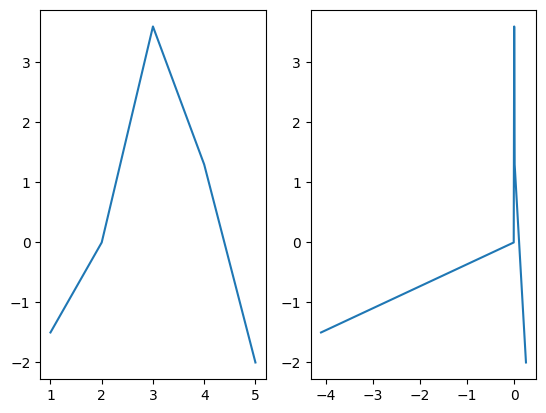

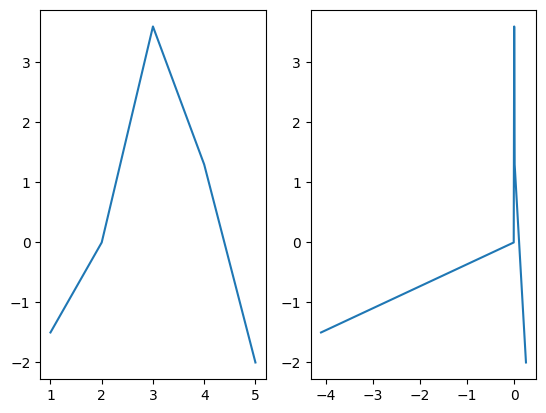

In [73]:
figure = plt.figure()
sp1 = figure.add_subplot(1,2,1)
sp1.plot(data.x0,data.y)
sp2 = figure.add_subplot(1,2,2)
sp2.plot(data.x1.sort_values(),data.y)
figure

In [74]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [76]:
y,X = patsy.dmatrices('y ~ x0 + x1',data)

In [77]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [78]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [79]:
import seaborn as sns

<Axes: xlabel='x0', ylabel='y'>

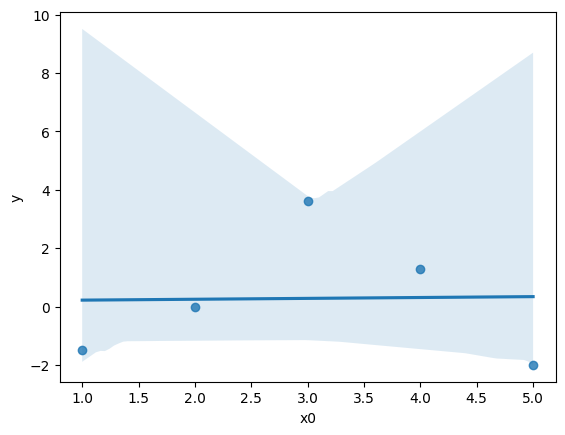

In [87]:
sns.regplot(data,x='x0',y='y',)

In [88]:
np.asarray(y)

array([[-1.5],
       [ 0. ],
       [ 3.6],
       [ 1.3],
       [-2. ]])

In [89]:
np.asarray(X)

array([[ 1.  ,  1.  ,  0.01],
       [ 1.  ,  2.  , -0.01],
       [ 1.  ,  3.  ,  0.25],
       [ 1.  ,  4.  , -4.1 ],
       [ 1.  ,  5.  ,  0.  ]])

In [90]:
patsy.dmatrices('y ~ x0 + x1 + 0',data)

(DesignMatrix with shape (5, 1)
      y
   -1.5
    0.0
    3.6
    1.3
   -2.0
   Terms:
     'y' (column 0),
 DesignMatrix with shape (5, 2)
   x0     x1
    1   0.01
    2  -0.01
    3   0.25
    4  -4.10
    5   0.00
   Terms:
     'x0' (column 0)
     'x1' (column 1))

In [91]:
coef, resid, _, _ = np.linalg.lstsq(X,y)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_17756\1767972689.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid, _, _ = np.linalg.lstsq(X,y)


In [92]:
coef

array([[ 0.31290976],
       [-0.07910564],
       [-0.26546384]])

In [94]:
X.design_info.column_names

['Intercept', 'x0', 'x1']

In [95]:
coef = pd.Series(coef.squeeze(),index=X.design_info.column_names)

In [96]:
coef

Intercept    0.312910
x0          -0.079106
x1          -0.265464
dtype: float64

In [97]:
test_data = pd.DataFrame(np.zeros((10,3)),columns=['x0','x1','y'])

In [99]:
test_data.x0 = np.arange(10)
test_data.y = test_data.x0*2+1
test_data.x1 = np.random.randn(10)

In [102]:
y,X = patsy.dmatrices('y ~ x0 + x1',test_data)

In [103]:
y

DesignMatrix with shape (10, 1)
   y
   1
   3
   5
   7
   9
  11
  13
  15
  17
  19
  Terms:
    'y' (column 0)

In [106]:
X

AttributeError: 'DesignMatrix' object has no attribute 'x0'

In [105]:
np.linalg.lstsq(X,y)[0]

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_17756\1378189188.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(X,y)[0]


array([[ 1.00000000e+00],
       [ 2.00000000e+00],
       [-2.77555756e-17]])

In [107]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [108]:
y,X = patsy.dmatrices('y ~ x0 + np.log(np.abs(x1)+1)',data)

In [109]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0  np.log(np.abs(x1) + 1)
          1   1                 0.00995
          1   2                 0.00995
          1   3                 0.22314
          1   4                 1.62924
          1   5                 0.00000
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.log(np.abs(x1) + 1)' (column 2)

In [111]:
y,X = patsy.dmatrices('y ~ standardize(x0) + center(x1)',data)

In [112]:
X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

In [113]:
new_data = pd.DataFrame({'x0':[6,7,8,9],
                         'x1':[3.1,-0.5,0,2.3],
                         'y':[1,2,3,4]})

In [115]:
new_X = patsy.build_design_matrices([X.design_info],new_data)

In [116]:
new_X

[DesignMatrix with shape (4, 3)
   Intercept  standardize(x0)  center(x1)
           1          2.12132        3.87
           1          2.82843        0.27
           1          3.53553        0.77
           1          4.24264        3.07
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2)]

In [122]:
y,X,XE = patsy.dmatrices('y ~ x0 ~ x1',data,)

PatsyError: ~ can only be used once, and only at the top level
    y ~ x0 ~ x1
    ^^^^^^

In [119]:
patsy.build_design_matrices()

DesignMatrix with shape (5, 2)
  Intercept  I(x0 + x1)
          1        1.01
          1        1.99
          1        3.25
          1       -0.10
          1        5.00
  Terms:
    'Intercept' (column 0)
    'I(x0 + x1)' (column 1)

In [120]:
patsy.__version__

'0.5.6'

In [128]:
data = pd.DataFrame({
    'key1':['a','a','b','c','a','b','a','b'],
    'key2':[0,1,0,1,0,1,0,0],
    'v1':[1,2,3,4,5,6,7,8],
    'v2':[-1,0,2.5,-0.5,4.0,-1.2,0.2,-1.7]
})

In [129]:
data

,key1,key2,v1,v2
0,a,0,1,-1.0
1,a,1,2,0.0
2,b,0,3,2.5
3,c,1,4,-0.5
4,a,0,5,4.0
5,b,1,6,-1.2
6,a,0,7,0.2
7,b,0,8,-1.7


In [131]:
y,X = patsy.dmatrices('v2 ~ key1',data)
X

DesignMatrix with shape (8, 3)
  Intercept  key1[T.b]  key1[T.c]
          1          0          0
          1          0          0
          1          1          0
          1          0          1
          1          0          0
          1          1          0
          1          0          0
          1          1          0
  Terms:
    'Intercept' (column 0)
    'key1' (columns 1:3)

In [132]:
patsy.dmatrices('v2 ~ key1 + 0',data)

(DesignMatrix with shape (8, 1)
     v2
   -1.0
    0.0
    2.5
   -0.5
    4.0
   -1.2
    0.2
   -1.7
   Terms:
     'v2' (column 0),
 DesignMatrix with shape (8, 3)
   key1[a]  key1[b]  key1[c]
         1        0        0
         1        0        0
         0        1        0
         0        0        1
         1        0        0
         0        1        0
         1        0        0
         0        1        0
   Terms:
     'key1' (columns 0:3))

In [133]:
y,X = patsy.dmatrices('v2 ~ C(key2)',data)

In [134]:
X

DesignMatrix with shape (8, 2)
  Intercept  C(key2)[T.1]
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             0
  Terms:
    'Intercept' (column 0)
    'C(key2)' (column 1)

In [135]:
data['key2'] = data['key2'].map({0:'zero',1:'one'})

In [136]:
data

,key1,key2,v1,v2
0,a,zero,1,-1.0
1,a,one,2,0.0
2,b,zero,3,2.5
3,c,one,4,-0.5
4,a,zero,5,4.0
5,b,one,6,-1.2
6,a,zero,7,0.2
7,b,zero,8,-1.7


In [137]:
patsy.dmatrices('v2 ~ key1 + key2',data)

(DesignMatrix with shape (8, 1)
     v2
   -1.0
    0.0
    2.5
   -0.5
    4.0
   -1.2
    0.2
   -1.7
   Terms:
     'v2' (column 0),
 DesignMatrix with shape (8, 4)
   Intercept  key1[T.b]  key1[T.c]  key2[T.zero]
           1          0          0             1
           1          0          0             0
           1          1          0             1
           1          0          1             0
           1          0          0             1
           1          1          0             0
           1          0          0             1
           1          1          0             1
   Terms:
     'Intercept' (column 0)
     'key1' (columns 1:3)
     'key2' (column 3))

In [149]:
y,X = patsy.dmatrices('v2 ~ key1 + key2 + key1:key2',data)

In [152]:
X

DesignMatrix with shape (8, 4)
  Intercept  key1[T.b]  key2[T.zero]  key1[T.b]:key2[T.zero]
          1          0             1                       0
          1          0             0                       0
          1          1             1                       1
          1          1             0                       0
          1          0             1                       0
          1          1             0                       0
          1          0             1                       0
          1          1             1                       1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)
    'key1:key2' (column 3)

In [151]:
np.asarray(X)

array([[1., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 1., 0., 0.],
       [1., 0., 1., 0.],
       [1., 1., 0., 0.],
       [1., 0., 1., 0.],
       [1., 1., 1., 1.]])

In [148]:
data

,key1,key2,v1,v2
0,a,zero,1,-1.0
1,a,one,2,0.0
2,b,zero,3,2.5
3,b,one,4,-0.5
4,a,zero,5,4.0
5,b,one,6,-1.2
6,a,zero,7,0.2
7,b,zero,8,-1.7


In [153]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [154]:
def dnorm(mean,var,size=1):
    if isinstance(size,int):
        size = size,
    return mean + np.sqrt(var) + np.random.randn(*size)

In [161]:
np.random.seed(12345)
N = 100
X = np.c_[dnorm(0,0.4,size=N),
          dnorm(0,0.6,size=N),
          dnorm(0,0.2,size=N)]
eps = dnorm(0,0.1,size=N)
beta = [0.1,0.3,0.5]

y = np.dot(X,beta) + eps

In [163]:
X[:5]

array([[ 0.42774787, -0.79106062,  1.5746947 ],
       [ 1.11139887,  0.21205648, -0.12114985],
       [ 0.11301682,  0.74193253,  0.75657576],
       [ 0.07672523, -0.15440953, -0.13017188],
       [ 2.5982361 ,  0.29202402, -0.72142048]])

In [164]:
y[:5]

array([ 2.65626531, -0.97983647,  0.55015556, -0.13332918,  0.68301081])

In [165]:
X_model = sm.add_constant(X)

In [166]:
X_model[:5]

array([[ 1.        ,  0.42774787, -0.79106062,  1.5746947 ],
       [ 1.        ,  1.11139887,  0.21205648, -0.12114985],
       [ 1.        ,  0.11301682,  0.74193253,  0.75657576],
       [ 1.        ,  0.07672523, -0.15440953, -0.13017188],
       [ 1.        ,  2.5982361 ,  0.29202402, -0.72142048]])

In [216]:
model = sm.OLS(y,X,hasconst=True)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     9.192
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           0.000221
Time:                        11:55:42   Log-Likelihood:                -153.12
No. Observations:                 100   AIC:                             312.2
Df Residuals:                      97   BIC:                             320.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3900      0.098      3.969      0.000       0.195       0.585
x2             0.2956      0.098      3.005      0.003       0.100       0.491
x3             0.5841      0.118      4.968      0.000       0.351       0.818
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.805
Skew:                           0.328   Prob(JB):                        0.405
Kurtosis:                       2.943   Cond. No.                         1.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
results = model.fit()

In [169]:
results.params

array([0.39004368, 0.29561838, 0.5841267 ])

In [170]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.437
Model:                            OLS   Adj. R-squared (uncentered):              0.420
Method:                 Least Squares   F-statistic:                              25.14
Date:                Sat, 20 Jan 2024   Prob (F-statistic):                    4.05e-12
Time:                        11:08:46   Log-Likelihood:                         -153.12
No. Observations:                 100   AIC:                                      312.2
Df Residuals:                      97   BIC:                                      320.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [171]:
data = pd.DataFrame(X,columns=['col0','col1','col2'])

In [172]:
data['y'] = y

In [197]:
data.head()

,col0,col1,col2,y
31,-0.198698,-1.026243,-1.294280,-2.154374
7,0.914202,1.755525,0.294228,-1.183169
1,1.111399,0.212056,-0.121150,-0.979836
66,0.608962,0.664039,0.179996,-0.944507
35,1.192601,1.329751,-1.973081,-0.903780


In [198]:
result = smf.ols('y ~ col0 + col1 + col2',data=data).fit()

In [199]:
result

In [200]:
result.params['Intercept']

0.4592952399746318

In [201]:
result.tvalues

Intercept    2.882883
col0         2.377438
col1         1.020530
col2         4.510690
dtype: float64

In [214]:
def drline(x,data):
    return x[0] + x[1]*data['col0'] + x[2]*data['col1'] + x[3]*data['col2']
figure.clear()
sp1 = figure.add_subplot(211,)
# sp1.plot(data.y,drline(result.params,data)-data.y)
sp1.plot(data.y,result.predict(data))
sp1.plot(data.y,[0]*len(data.y),'r--')
sp2 = figure.add_subplot(212)
sp2.plot(data.y,drline(result.params,data))
sp2.plot(data.y,[0]*len(data.y),'r--')
figure

ValueError: x and y must have same first dimension, but have shapes (2, 100) and (100,)

In [196]:
data = data.iloc[list(data.y.sort_values().index)]

In [205]:
result.predict(data[:5])

31   -0.383983
7     1.046620
1     0.701156
66    0.783639
35   -0.113607
dtype: float64

In [219]:
data = data.sort_index()

In [235]:
smf.ols('y ~ col1 ',data=data,subset=[i for i in range(70)],drop_cols=['col1']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 20 Jan 2024   Prob (F-statistic):                nan
Time:                        12:10:30   Log-Likelihood:                -110.78
No. Observations:                  70   AIC:                             223.6
Df Residuals:                      69   BIC:                             225.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8406      0.142      5.928      0.000       0.558       1.123
==============================================================================
Omnibus:                        3.106   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                2.278
Skew:                           0.374   Prob(JB):                        0.320
Kurtosis:                       3.472   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
result.predict()

In [239]:
result.predict(data,)

0     1.295885
1     0.701156
2     0.967903
3     0.392951
4     0.772840
        ...   
95    1.130284
96    1.556224
97    1.292394
98    1.037971
99    1.460460
Length: 100, dtype: float64

In [240]:
example_df = pd.DataFrame(np.random.randn(10,3))
example_df.columns = ['a','b','c']
fit = smf.ols('a ~ b',example_df).fit()

In [242]:
fit.predict(example_df['b'])

0   -0.181991
1   -0.105923
2   -0.211179
3    0.045899
4   -0.324243
5   -0.345786
6   -0.291143
7   -0.230696
8   -0.121870
9   -0.359799
dtype: float64

In [243]:
import random

In [260]:
init_x = 4
values = [init_x,init_x]
N = 1000

b0 = 0.8
b1 = -0.4
noise = dnorm(0,0.000000001,N)
for i in range(N):
    new_x = values[-1]*b0 + values[-2]*b1 + noise[i] 
    values.append(new_x)

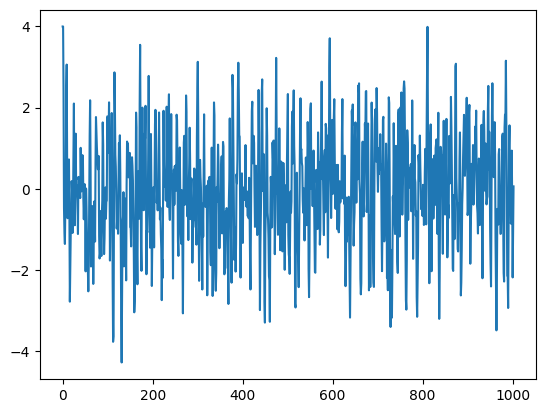

In [261]:
figure.clear()
sp = figure.add_subplot(111)
sp.plot(np.linspace(0,N+2,N+2),values)
figure

In [264]:
import statsmodels

In [270]:
MAXLAGS = 5
model = statsmodels.tsa.ar_model.AutoReg(data = values,lags=MAXLAGS)
results = model.fit(MAXLAGS)

TypeError: AutoReg.__init__() got an unexpected keyword argument 'data'

In [271]:
import sklearn

In [272]:
train = pd.read_csv('training-testing/train.csv')
test = pd.read_csv('training-testing/test.csv')


In [273]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [274]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [276]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [277]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [278]:
impute_value = train['Age'].median()

In [279]:
impute_value

28.0

In [315]:
train['Age'].fillna(impute_value,inplace=True)

In [325]:
test['Age'].fillna(impute_value,inplace=True)

In [296]:
train['IsFemale'] = (train['Sex']=='female').astype(int)

In [299]:
test['IsFemale'] = (test['Sex']=='female').astype(int)

In [300]:
train['IsFemale']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: IsFemale, Length: 891, dtype: int32

In [301]:
test['IsFemale']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: IsFemale, Length: 418, dtype: int32

In [302]:
predictors = ['Pclass','IsFemale','Age']

In [317]:
X_train = train[predictors].values

In [326]:
X_test = test[predictors].values

In [330]:
y_train = train['Survived'].values
y_test = test['Survived'].values

KeyError: 'Survived'

In [322]:
X_train

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       ...,
       [ 3.,  1., 28.],
       [ 1.,  0., 26.],
       [ 3.,  0., 32.]])

In [307]:
y_train[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [308]:
from sklearn.linear_model import LogisticRegression

In [309]:
model = LogisticRegression()

In [323]:
model.fit(X_train,y_train)

LogisticRegression()

In [327]:
y_predict = model.predict(X_test)

In [328]:
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [329]:
(y_test == y_predict)

ValueError: operands could not be broadcast together with shapes (891,) (418,) 

In [331]:
from sklearn.linear_model import LogisticRegressionCV

In [333]:
model_cv = LogisticRegressionCV(Cs=10)

In [334]:
model_cv.fit(X_train,y_train)

LogisticRegressionCV()

In [335]:
from sklearn.model_selection import cross_val_score

In [336]:
model = LogisticRegression(C=10)

In [339]:
scores = cross_val_score(model,X_train,y_train,cv=5)

In [340]:
scores

array([0.7877095 , 0.78651685, 0.79213483, 0.7752809 , 0.79213483])